# Interoperability between NumPy and external libraries

## Converting ndarray to PIL Image

The following is based on an example by Pauli Virtanen in [Scipy lectures](http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#interoperability-features).

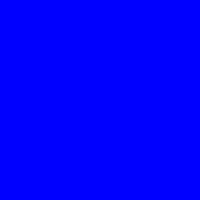

In [44]:
from PIL import Image
import numpy as np
# In PIL, RGB images consist of 4-byte integers whose bytes are [RR,GG,BB, AA]
data = np.zeros((200, 200), dtype=[('r', np.uint8),
                                   ('g', np.uint8),
                                   ('b', np.uint8),
                                   ('a', np.uint8)])
img = Image.fromarray(data, mode='RGBA')
data['b'] =  255 # Red
data['a'] = 255
img

NumPy and PIL share the same block of memory!

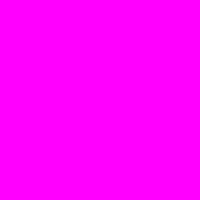

In [45]:
data['r']=255
img

## Converting PIL Image to ndarray

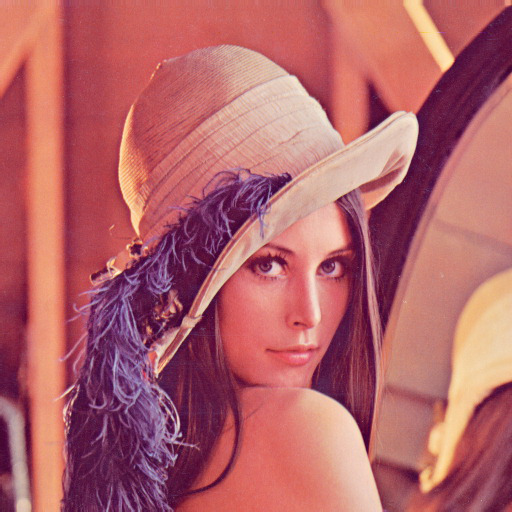

In [37]:
from PIL import Image
img = Image.open('lena.jpg')
img

In [38]:
arr = np.asarray(img)
arr.shape

(512, 512, 3)

Unfortunately, PIL give only read-only acces to the memory block.

In [39]:
arr /= 2

ValueError: output array is read-only

## The \_\_array\_interface\_\_

Any object that exposes a suitable dictionary named
``__array_interface__`` may be converted to a NumPy array. This is
handy for exchanging data with external libraries. The array interface
has the following important keys (see
http://docs.scipy.org/doc/numpy/reference/arrays.interface.html):

 - **shape**: Tuple whose elements are the array size in each dimension.
 - **typestr**: A string providing the basic type of the homogenous array. It consists of 3 characters - endiannes, type and number of bytes)
 - **data**: (20495857, True); 2-tuple—pointer to data and boolean to
indicate whether memory is read-only
 - **strides**
 - **version**: 3

In [40]:
a = np.arange(5)
a.__array_interface__

{'data': (38464176, False),
 'descr': [('', '<i8')],
 'shape': (5,),
 'strides': None,
 'typestr': '<i8',
 'version': 3}

## Copy or view

Slicing returns view on the same array

In [41]:
a[::2].__array_interface__['data']

(38464176, False)

Fancy indexing returns a copy

In [42]:
a[[0, 2, 4]].__array_interface__['data']

(38473152, False)

## Exercise

Original exercise by Stefan van der Walt and Juan Nunez-Iglesias.

An author of a foreign package (included with the exercizes as
``problems/mutable_str.py``) provides a string class that
allocates its own memory:

```ipython
In [1]: from mutable_str import MutableString
In [2]: s = MutableString('abcde')
In [3]: print s
abcde
```

You'd like to view these mutable (*mutable* means the ability to modify in place)
strings as ndarrays, in order to manipulate the underlying memory.

Add an __array_interface__ dictionary attribute to s, then convert s to an
ndarray. Numerically add "2" to the array (use the in-place operator ``+=``).

Then print the original string to ensure that its value was modified.

> **Hint:** Documentation for NumPy's ``__array_interface__``
  may be found [in the online docs](http://docs.scipy.org/doc/numpy/reference/arrays.interface.html).

Here's a skeleton outline:

In [46]:
import numpy as np
from mutable_str import MutableString

s = MutableString('abcde')

# --- EDIT THIS SECTION ---

# Create an array interface to this foreign object
s.__array_interface__ = {'data' : (XXX, False), # (ptr, is read_only?)
                         'shape' : XXX,
                         'typestr' : '|u1', # typecode unsigned character
                         }

# --- EDIT THIS SECTION ---

print 'String before converting to array:', s
sa = np.asarray(s)

print 'String after converting to array:', sa

sa += 2
print 'String after adding "2" to array:', s

NameError: name 'XXX' is not defined

In [47]:
s.data_ptr

140030631963184


## Extra reading

* SciPy lectures: http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#interoperability-features
* PEP 3118 -- Revising the buffer protocol: https://www.python.org/dev/peps/pep-3118/
* Introduction to buffer protocol: https://jakevdp.github.io/blog/2014/05/05/introduction-to-the-python-buffer-protocol/